In [29]:
!pip install dlib
!pip install ipywidgets
!pip install opencv-python

import cv2
import dlib
import numpy as np

from google.colab.patches import cv2_imshow

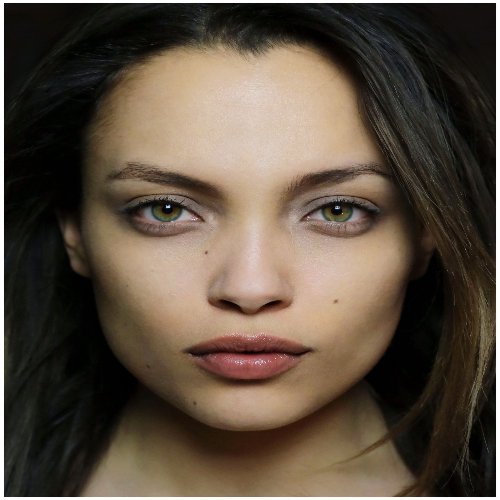

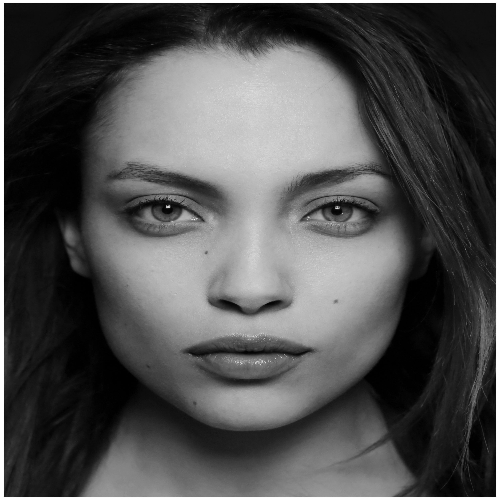

In [53]:
import cv2  # Import the OpenCV library
import dlib
import numpy as np

from google.colab.patches import cv2_imshow

img = cv2.imread("/content/face.jpg")
img = cv2.resize(img, (500, 500))
cv2_imshow(img)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.resize(gray, (500, 500))
cv2_imshow(gray)
copy = cv2.imread("/content/face.jpg")
copy = cv2.resize(copy, (500, 500))

In [54]:
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!bunzip2 shape_predictor_68_face_landmarks.dat.bz2

--2024-11-28 14:18:05--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2.4’

shape_predictor_68_ 100%[===================>]  61.07M   112MB/s    in 0.5s    

2024-11-28 14:18:05 (112 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2.4’ saved [64040097/64040097]

bunzip2: Output file shape_predictor_68_face_landmarks.dat already exists.


In [55]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

In [56]:
faces=detector(gray)
print(faces)

rectangles[[(95, 130) (405, 439)]]


rectangles[[(95, 130) (405, 439)]]


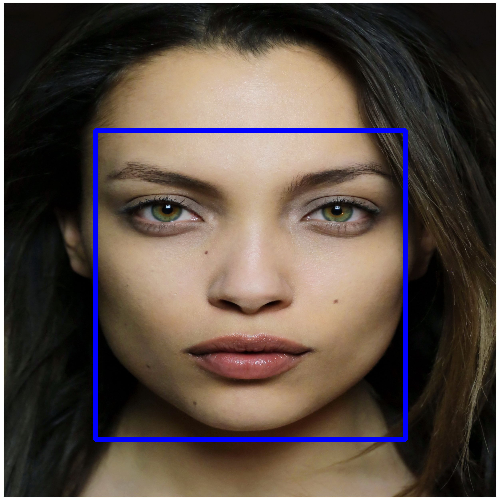

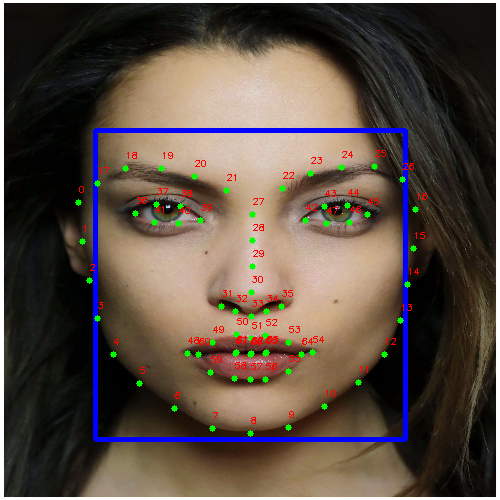

In [57]:
landmarkPoints=[]

# Define functions and variables (from other cells)
def empty(a):
    pass
    cv2.namedWindow("Frame")
    cv2.resizeWindow("Frame", 640, 240)
    cv2.createTrackbar("Blue", "Frame", 0, 255, empty)
    cv2.createTrackbar("Green", "Frame", 0, 255, empty)
    cv2.createTrackbar("Red", "Frame", 0, 255, empty)

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

# Get faces from the gray image
faces = detector(gray)
print(faces)

# Continue with processing
landmarkPoints = []
for face in faces:
    x1, y1 = face.left(), face.top()
    x2, y2 = face.right(), face.bottom()
    cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 3)
    cv2_imshow(img)

    landmarks = predictor(gray, face)

    for n in range(0, 68):
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        landmarkPoints.append((x, y))

        cv2.circle(img, (x, y), 3, (0, 255, 0), cv2.FILLED)
        cv2.putText(img, str(n), (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0, 0, 255), 1)

    cv2_imshow(img)

    landmarkPoints = np.array(landmarkPoints)

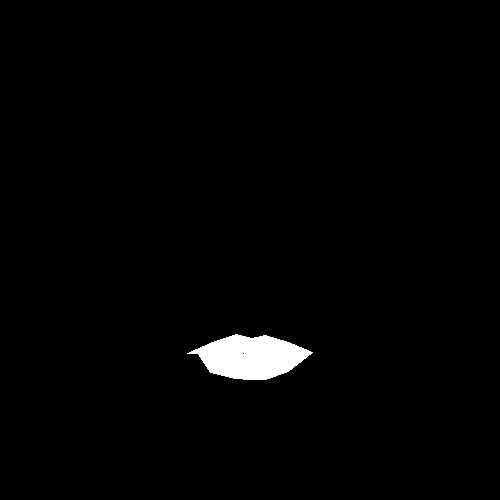

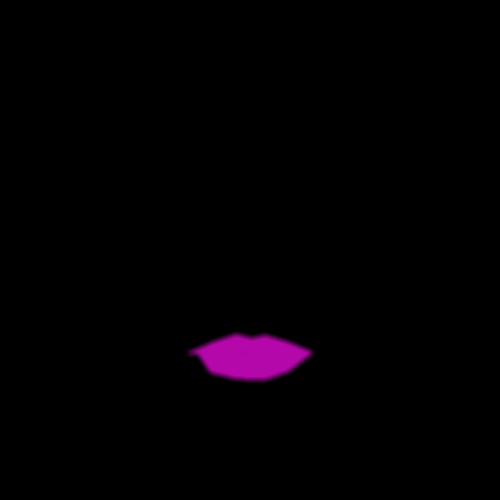

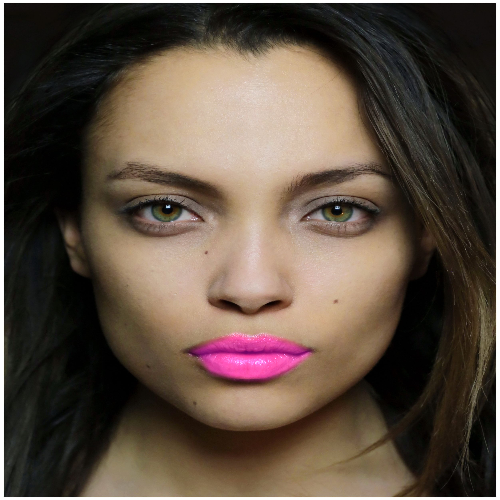

In [58]:
# Create mask for lips
lipMask = np.zeros_like(img)

# Define lip region using landmarks 48 to 67
lipRegion = np.array(landmarkPoints[48:68])  # Replace 'landmarkPoints' with actual points
cv2.fillPoly(lipMask, [lipRegion], (255, 255, 255))

# Display the lip mask
cv2_imshow(lipMask)

# Add color to the lip mask
lipColor = np.zeros_like(lipMask)
b, g, r = 170, 8, 180  # Example lipstick color (Pinkish)
lipColor[:] = b, g, r
lipColor = cv2.bitwise_and(lipMask, lipColor)

# Apply Gaussian blur for smooth lipstick application
lipColor = cv2.GaussianBlur(lipColor, (7, 7), 10)
cv2_imshow(lipColor)

# Combine the lipstick with the original image
finalLipstickImage = cv2.addWeighted(copy, 1, lipColor, 0.6, 0)

# Display the final image with lipstick applied
cv2_imshow(finalLipstickImage)

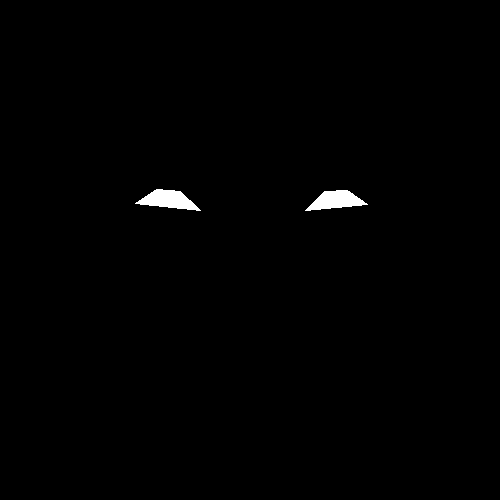

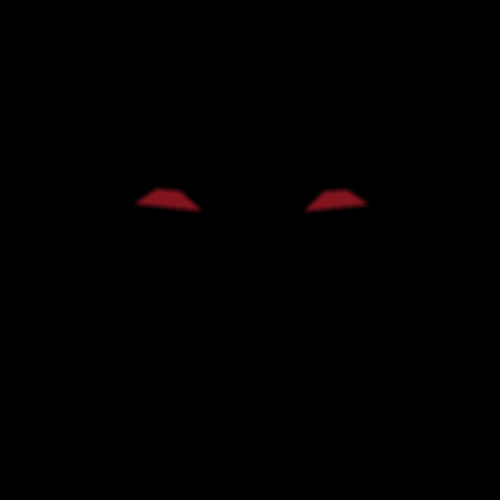

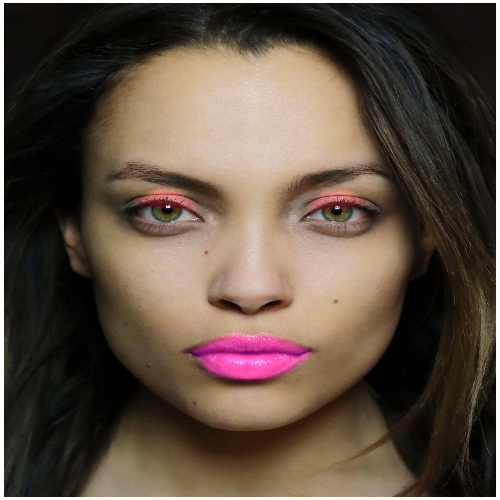

In [65]:
# Create mask for the left and right eye shadows
eyeMask = np.zeros_like(img)

# Left eye shadow region (above landmarks 36-39)
leftEyeShadow = np.array([
    (landmarkPoints[36][0], landmarkPoints[36][1] - 10),
    (landmarkPoints[37][0], landmarkPoints[37][1] - 15),
    (landmarkPoints[38][0], landmarkPoints[38][1] - 15),
    (landmarkPoints[39][0], landmarkPoints[39][1] - 10),
])
cv2.fillPoly(eyeMask, [leftEyeShadow], (255, 255, 255))

# Right eye shadow region (above landmarks 42-45)
rightEyeShadow = np.array([
    (landmarkPoints[42][0], landmarkPoints[42][1] - 10),
    (landmarkPoints[43][0], landmarkPoints[43][1] - 15),
    (landmarkPoints[44][0], landmarkPoints[44][1] - 15),
    (landmarkPoints[45][0], landmarkPoints[45][1] - 10),
])
cv2.fillPoly(eyeMask, [rightEyeShadow], (255, 255, 255))

cv2_imshow(eyeMask)

# Add color to the mask
eyeShadowColor = np.zeros_like(eyeMask)
b, g, r = 30, 20, 130  # Lavender color
eyeShadowColor[:] = b, g, r
eyeShadowColor = cv2.bitwise_and(eyeMask, eyeShadowColor)

# Apply Gaussian blur for smooth effect
eyeShadowColor = cv2.GaussianBlur(eyeShadowColor, (7, 7), 5)
cv2_imshow(eyeShadowColor)

# Combine with the original image
finalImage = cv2.addWeighted(finalLipstickImage, 1, eyeShadowColor, 0.6, 0)
cv2_imshow(finalImage)

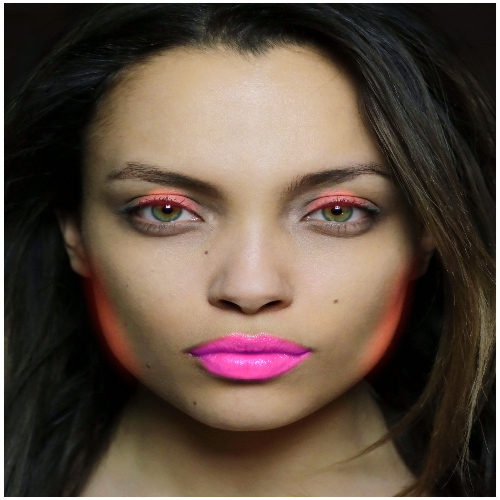

In [68]:
# Process each detected face
for face in faces:
    landmarks = predictor(gray, face)

    # Get the cheek landmark points
    left_cheek = np.array([
        (landmarks.part(1).x, landmarks.part(1).y),
        (landmarks.part(2).x, landmarks.part(2).y),
        (landmarks.part(3).x, landmarks.part(3).y),
        (landmarks.part(4).x, landmarks.part(4).y),
        (landmarks.part(5).x, landmarks.part(5).y),
    ])
    right_cheek = np.array([
        (landmarks.part(15).x, landmarks.part(15).y),
        (landmarks.part(14).x, landmarks.part(14).y),
        (landmarks.part(13).x, landmarks.part(13).y),
        (landmarks.part(12).x, landmarks.part(12).y),
        (landmarks.part(11).x, landmarks.part(11).y),
    ])

    # Create blush masks
    blushMask = np.zeros_like(img)

    # Draw blush areas
    cv2.fillPoly(blushMask, [left_cheek], (12, 22, 200))  # Pink for left cheek
    cv2.fillPoly(blushMask, [right_cheek], (12, 22, 200))  # Pink for right cheek

    # Smooth the blush effect
    blushMask = cv2.GaussianBlur(blushMask, (21, 21), 50)

    # Blend the blush with the original image
    finalBlush = cv2.addWeighted(finalImage , 1, blushMask, 0.5, 0)

    # Show the final result
    cv2_imshow(finalBlush)

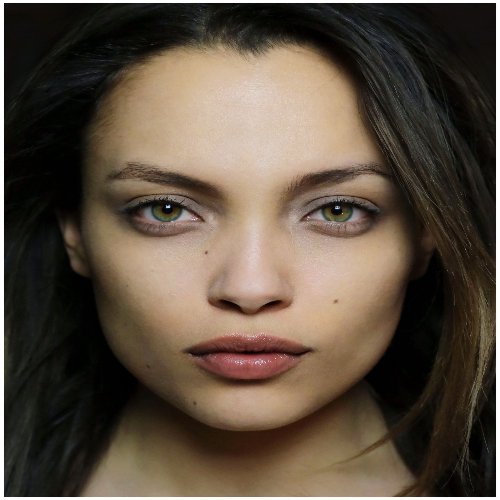

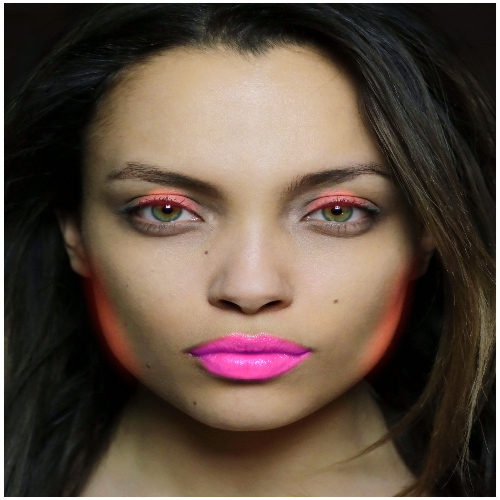

In [71]:
#Original Input image
cv2_imshow(copy)
#Final Output image
cv2_imshow(finalBlush)